In [1]:
import numpy as np
import pandas as pd
import pickle
from scipy import integrate, signal
from scipy.interpolate import interp1d
from scipy.optimize import fsolve
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from toy_models import *
%matplotlib widget

## f_XY_4eq does not consider the dynamic of Js

In [68]:
ok = False
theta0 = np.radians(20)
Jmax = 1
J12 = 100

res_ksmall = []
params_ksmall = [J12, Jmax, theta0, 80*np.cos(np.radians(10)), 80*np.sin(np.radians(10))]

#time points
t = np.linspace(0, 50, 100)
for _ in range(100):
    while ok == False:
        x0 = [0, 0, np.random.uniform(0, np.pi/6), np.random.uniform(-np.pi/6, 0)]
        if (abs(x0[2] + x0[3])) > np.radians(2):
            ok=True
    #x0 = [0, 0, np.random.uniform(0, np.pi/4), np.random.uniform(-np.pi/4, 0)]
    res_ksmall.append(integrate.solve_ivp(lambda t, x: f_XY_4eq(x, t, params_ksmall), [t[0], t[-1]], x0, t_eval=t, method='DOP853'))
    ok = False

# Save the results to a pickle file
# with open('ksmall_simp.pkl', 'wb') as f:
#     pickle.dump((params_ksmall, res_ksmall), f)

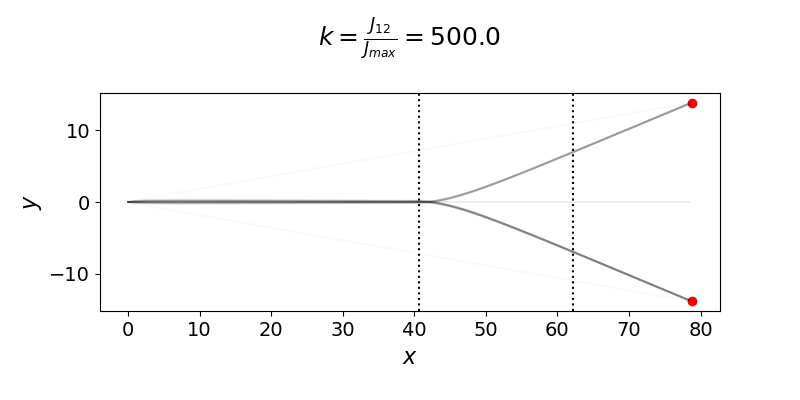

In [2]:
# read from pickle file
with open('k500_t20_simpl.pkl', 'rb') as f:
    params_ksmall, res_ksmall = pickle.load(f)

fig, ax = plt.subplots(1, 1, sharex=True, figsize=(8, 4))

for r in res_ksmall:
    plot_traj_ax(r, params_ksmall, ax, 40)

ax.scatter(params_ksmall[3], params_ksmall[4], c='r')
ax.scatter(params_ksmall[3], -params_ksmall[4], c='r')
ax.axvline(params_ksmall[3]-params_ksmall[4]/np.tan(params_ksmall[2]), c='black', ls=':', alpha=1)
ax.axvline(params_ksmall[3]-params_ksmall[4]/np.tan(2*params_ksmall[2]), c='black', ls=':', alpha=1)
# set title with value of J12/Jmax
ax.set_title(r'$k=\frac{J_{12}}{J_{max}} = $' + str(params_ksmall[0]/params_ksmall[1]) + '\n', fontsize=18)
# set same scale for x and y axis
ax.set_aspect('equal', 'box')
# set x label
ax.set_xlabel(r'$x$', fontsize=16)
ax.set_ylabel(r'$y$', fontsize=16)
# set ticks size
ax.tick_params(axis='both', which='major', labelsize=14)
#set limits
# ax.set_xlim(35, 50)
# ax.set_ylim(-2, 2)
plt.show()

# save figure
# fig.savefig(f'../img/zoomin_traj.pdf', dpi=300, bbox_inches='tight')

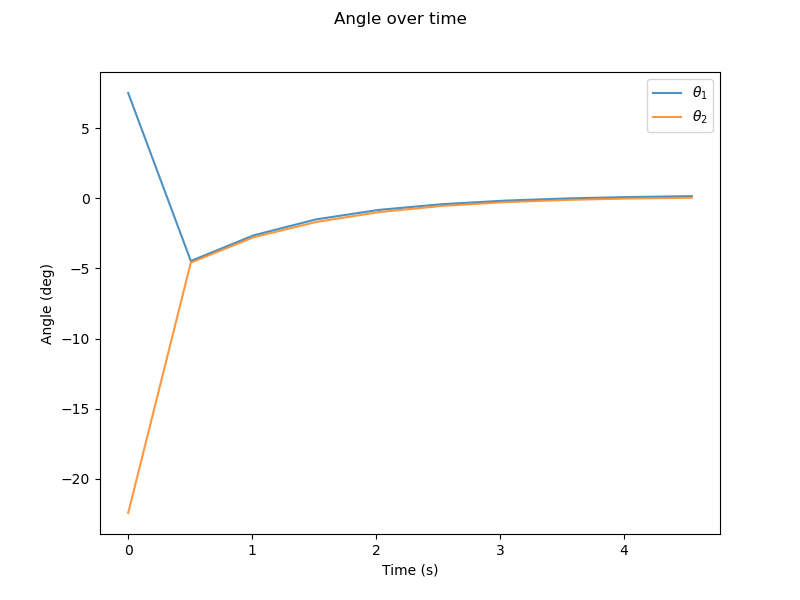

In [7]:
plot_thetas(res_ksmall[0],10)

In [71]:
traj_clean = []

x_limit = 20 # check if reasonable
y_threshold_initial = 2.0
y_threshold = 10.0

# clean up data
for r in res_ksmall:
    # Check if the trajectory goes straight at the beginning
    if np.all(np.abs(r.y[1][r.y[0] < x_limit]) < y_threshold_initial):
        # If it does, check if the trajectory reaches the upper target
        if r.y[1][-1] > y_threshold:
            traj_clean.append(r)
        # Check if the trajectory reaches the lower target
        elif r.y[1][-1] < -y_threshold:
            traj_clean.append(r)
    else:
        print("Trajectory does not reach target")

Trajectory does not reach target
Trajectory does not reach target
Trajectory does not reach target
Trajectory does not reach target
Trajectory does not reach target
Trajectory does not reach target
Trajectory does not reach target
Trajectory does not reach target
Trajectory does not reach target
Trajectory does not reach target


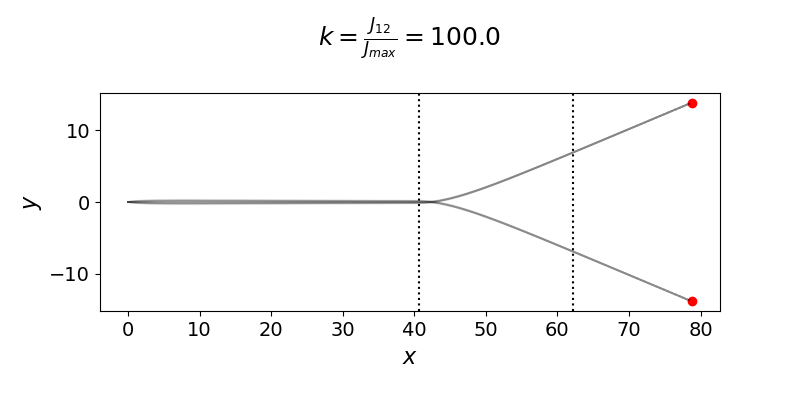

In [73]:
fig, ax = plt.subplots(1, 1, sharex=True, figsize=(8, 4))

for r in traj_clean:
    plot_traj_ax(r, params_ksmall, ax, 100)

ax.scatter(params_ksmall[3], params_ksmall[4], c='r')
ax.scatter(params_ksmall[3], -params_ksmall[4], c='r')
ax.axvline(params_ksmall[3]-params_ksmall[4]/np.tan(params_ksmall[2]), c='black', ls=':', alpha=1)
ax.axvline(params_ksmall[3]-params_ksmall[4]/np.tan(2*params_ksmall[2]), c='black', ls=':', alpha=1)
# set title with value of J12/Jmax
ax.set_title(r'$k=\frac{J_{12}}{J_{max}} = $' + str(params_ksmall[0]/params_ksmall[1]) + '\n', fontsize=18)
# set same scale for x and y axis
ax.set_aspect('equal', 'box')
# set x label
ax.set_xlabel(r'$x$', fontsize=16)
ax.set_ylabel(r'$y$', fontsize=16)
# set ticks size
ax.tick_params(axis='both', which='major', labelsize=14)
plt.show()

# save figure
fig.savefig(f'../img/traj_simp_kbig.pdf', dpi=300, bbox_inches='tight')

---
---
## Run multiple integrations

In [5]:
for i in [5, 10, 15, 20, 25, 30, 35, 40, 45]:
    print(i)
    theta0 = np.radians(i)
    Jmax = 1
    J12 = 50

    # FAR TARGETS

    res_kbig = []

    #parameters (alpha, beta, J, Jmax, theta0, xt, yt)
    params_kbig = [J12, Jmax, theta0, 80*np.cos(np.radians(10)), 80*np.sin(np.radians(10))]

    #time points
    t = np.linspace(0, 50, 5000)
    for _ in range(50):
        x0 = [0, 0, np.random.uniform(0, np.pi/6), np.random.uniform(-np.pi/6, 0)]
        res_kbig.append(integrate.solve_ivp(lambda t, x: f_XY_4eq(x, t, params_kbig), [t[0], t[-1]], x0, t_eval=None, method='DOP853'))

    # Save the results to a pickle file
    with open(f'k{J12/Jmax}_t{i}_simpl.pkl', 'wb') as f:
        pickle.dump((params_kbig, res_kbig), f)

5
10
15
20
25
30
35
40
45


## OBS:
- increasing J12 decrease the number of trajectories that stay in the compromise.



---
---
---
---
---
---
---
---
---
# f_XY does consider the dynamic of Js

### CASE K SMALL (J12/Jmax << 1)

In [ ]:
for i in [15, 20, 25, 30, 35, 40, 45]:
    print(i)
    theta0 = np.radians(i)
    Jmax = 1
    J12 = 500

    # FAR TARGETS

    res_J = []

    #parameters (alpha, beta, J, Jmax, theta0, xt, yt)
    params_J = [1000, 1000, J12, Jmax, theta0, 80*np.cos(np.radians(10)), 80*np.sin(np.radians(10))]


    #time points
    t = np.linspace(0, 50, 1000)
    for _ in range(50):
        x0 = [0, 0, np.random.uniform(0, np.pi/6), np.random.uniform(-np.pi/6, 0), 1, 1]
        res_J.append(integrate.solve_ivp(lambda t, x: f_XY(x, t, params_J), [t[0], t[-1]], x0, t_eval=t))

    # Save the results to a pickle file
    with open(f'k{J12/Jmax}_t{i}.pkl', 'wb') as f:
        pickle.dump((params_J, res_J), f)

In [3]:
ok = False
theta0 = np.radians(20)
Jmax = 1
J12 = 100

res_J_ksmall = []

#parameters (alpha, beta, J, Jmax, theta0, xt, yt)
params_J_ksmall = [1000, 1000, J12, Jmax, theta0, 80*np.cos(np.radians(10)), 80*np.sin(np.radians(10))]

#time points
t = np.linspace(0, 50, 1000)
for _ in range(100):
    while ok == False:
        x0 = [0, 0, np.random.uniform(0, np.pi/6), np.random.uniform(-np.pi/6, 0), 1, 1]
        if (abs(x0[2] + x0[3])) > np.radians(2):
            ok=True
    res_J_ksmall.append(integrate.solve_ivp(lambda t, x: f_XY(x, t, params_J_ksmall), [t[0], t[-1]], x0, t_eval=t))
    ok = False

with open('feedback_kbig.pkl', 'wb') as f:
    pickle.dump((params_J_ksmall, res_J_ksmall), f)

In [2]:
# Save the results to a pickle file
with open('feedback_kbig.pkl', 'rb') as f:
    params_J_ksmall, res_J_ksmall = pickle.load(f)

traj_clean = []

x_limit = 40 # check if reasonable
y_threshold_initial = 2.0
y_threshold = 10.0

# clean up data
for r in res_J_ksmall:
    # Check if the trajectory goes straight at the beginning
    if np.all(np.abs(r.y[1][r.y[0] < x_limit]) < y_threshold_initial):
        # If it does, check if the trajectory reaches the upper target

        traj_clean.append(r)
        # Check if the trajectory reaches the lower target

    else:
        print("Traj no straight")

Traj no straight
Traj no straight
Traj no straight
Traj no straight
Traj no straight
Traj no straight
Traj no straight
Traj no straight
Traj no straight
Traj no straight
Traj no straight
Traj no straight


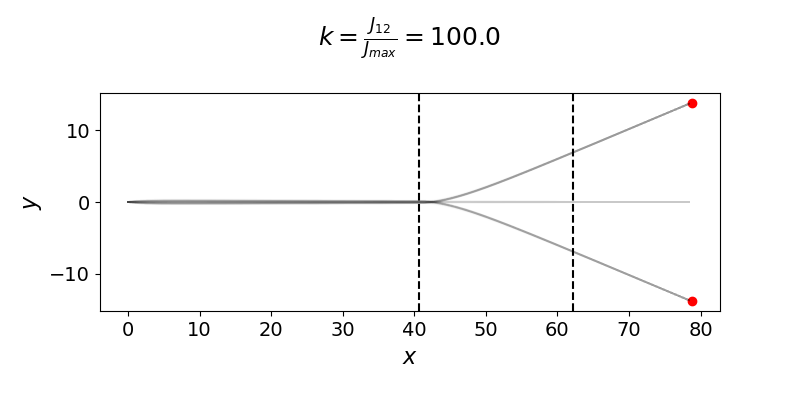

In [4]:

fig, ax = plt.subplots(1, 1, sharex=True, figsize=(8, 4))

for r in traj_clean:
    plot_traj_ax(r, params_J_ksmall, ax, len(res_J_ksmall))

ax.scatter(params_J_ksmall[5], params_J_ksmall[6], c='r')
ax.scatter(params_J_ksmall[5], -params_J_ksmall[6], c='r')
ax.axvline(params_J_ksmall[5]-params_J_ksmall[6]/np.tan(2*params_J_ksmall[4]), c='black', ls='--')
ax.axvline(params_J_ksmall[5]-params_J_ksmall[6]/np.tan(params_J_ksmall[4]), c='black', ls='--')
# set title with value of J12/Jmax
ax.set_title(r'$k=\frac{J_{12}}{J_{max}} = $' + str(params_J_ksmall[2]/params_J_ksmall[3]) + '\n', fontsize=18)
# set same scale for x and y axis
ax.set_aspect('equal', 'box')
# set x label
ax.set_xlabel(r'$x$', fontsize=16)
ax.set_ylabel(r'$y$', fontsize=16)
# set ticks size
ax.tick_params(axis='both', which='major', labelsize=14)
plt.show()
plt.savefig('../img/traj_kbig.pdf', dpi=300, bbox_inches='tight')

Some comments:

Evolving the system time dependent, when the system starts from far (i.e. small omega at t=0) the Js go to zero. In this case when $\theta_1=\theta_2$ the system is in a "minimum" of potential and it doesn't move

## Quantify the bifurcation

In [85]:
bifurcation = []

for i in range(20,50,5):

    # Load the results from the pickle file
    with open(f'k50.0_t{i}.pkl', 'rb') as f:
        params_ksmall, res_ksmall = pickle.load(f)
        
    x_limit = i # check if reasonable
    y_threshold_initial = 1.0
    y_threshold = 1.5

    # Lists to store the filtered trajectories
    upper_target_trajectories = []
    lower_target_trajectories = []

    # Analyze each trajectory
    for r in res_ksmall:
        # Check if the trajectory goes straight at the beginning
        if np.all(np.abs(r.y[1][r.y[0] < x_limit]) < y_threshold_initial):
            # If it does, check if the trajectory reaches the upper target
            if r.y[1][-1] > y_threshold:
                upper_target_trajectories.append(r)
            # Check if the trajectory reaches the lower target
            elif r.y[1][-1] < -y_threshold:
                lower_target_trajectories.append(r)

    #len(upper_target_trajectories), len(lower_target_trajectories)

    common_x_values = np.linspace(i, max([r.y[0][-1] for r in res_ksmall]), 1000) #CHECK

    avg_y_upper_filtered = []
    for r in upper_target_trajectories:
        f = interp1d(r.y[0], r.y[1], fill_value="extrapolate", bounds_error=False)
        avg_y_upper_filtered.append(f(common_x_values))

    avg_y_upper_filtered = np.nanmean(avg_y_upper_filtered, axis=0)

    # Calculate average y values for the lower group
    avg_y_lower_filtered = []
    for r in lower_target_trajectories:
        f = interp1d(r.y[0], r.y[1], fill_value="extrapolate", bounds_error=False)
        avg_y_lower_filtered.append(f(common_x_values))

    avg_y_lower_filtered = np.nanmean(avg_y_lower_filtered, axis=0)

    # Find the x values where the two averages intersect
    intersection_indices = np.where(np.isclose(avg_y_upper_filtered, avg_y_lower_filtered, atol=0.1))[0]
    intersection_points = common_x_values[intersection_indices]
    mean_intersection_point = np.mean(intersection_points)
    std_dev_intersection_point = np.std(intersection_points)

    # save i, mean_intersection_point, std_dev_intersection_point in list bifurcation
    bifurcation.append([i, mean_intersection_point, std_dev_intersection_point])



/Users/eleonoragatti/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:37: RuntimeWarning: Mean of empty slice
/Users/eleonoragatti/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:45: RuntimeWarning: Mean of empty slice


In [90]:
bifurcation

[[20, 42.59178410319759, 0.2356284429933941],
 [25, 50.57452084355681, 0.24637976164173003],
 [30, 56.207246902632264, 0.20929435809625713],
 [35, 60.15013812460702, 0.2127979459958729],
 [40, 63.32832228226924, 0.21050162014413934],
 [45, 65.87512975667701, 0.21207021824222702]]

In [92]:
# bifurcation
tar_x = params_ksmall[5]
tar_y = params_ksmall[6]

# convert bifurcatin x to angle
bifurcation_angle = []
for i in range(len(bifurcation)):
    bifurcation_angle.append([bifurcation[i][0],
                              np.degrees(np.arctan(tar_y/(tar_x-bifurcation[i][1]))),
                              np.degrees(bifurcation[i][2]/(tar_x))])

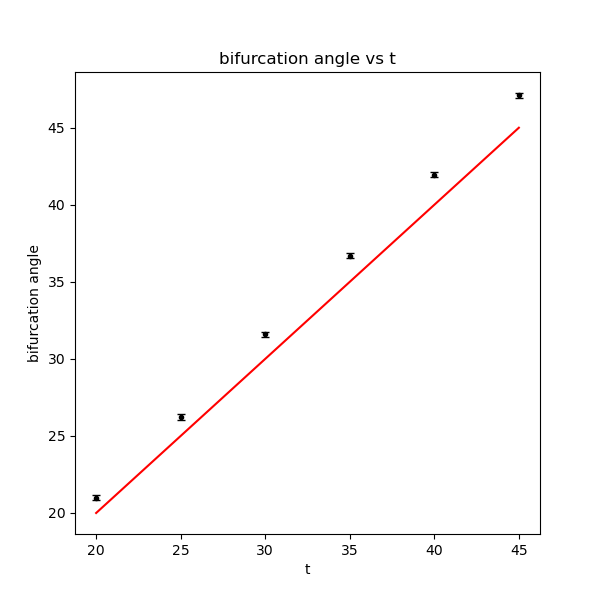

In [93]:
# plot bifurcation angle
fig, ax = plt.subplots(figsize=(6,6))
ax.errorbar([i[0] for i in bifurcation_angle], [i[1] for i in bifurcation_angle], yerr=[i[2] for i in bifurcation_angle], fmt='.', capsize=3, color='black')
ax.plot([i[0] for i in bifurcation_angle], [i[0] for i in bifurcation_angle], color='r')
# (ang_thresh, np.degrees(ang_crit), yerr=np.degrees(std), fmt='o', capsize=3, color='black')
plt.xlabel('t')
plt.ylabel('bifurcation angle')
plt.title('bifurcation angle vs t')
plt.show()


/Users/eleonoragatti/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: Mean of empty slice
  app.launch_new_instance()


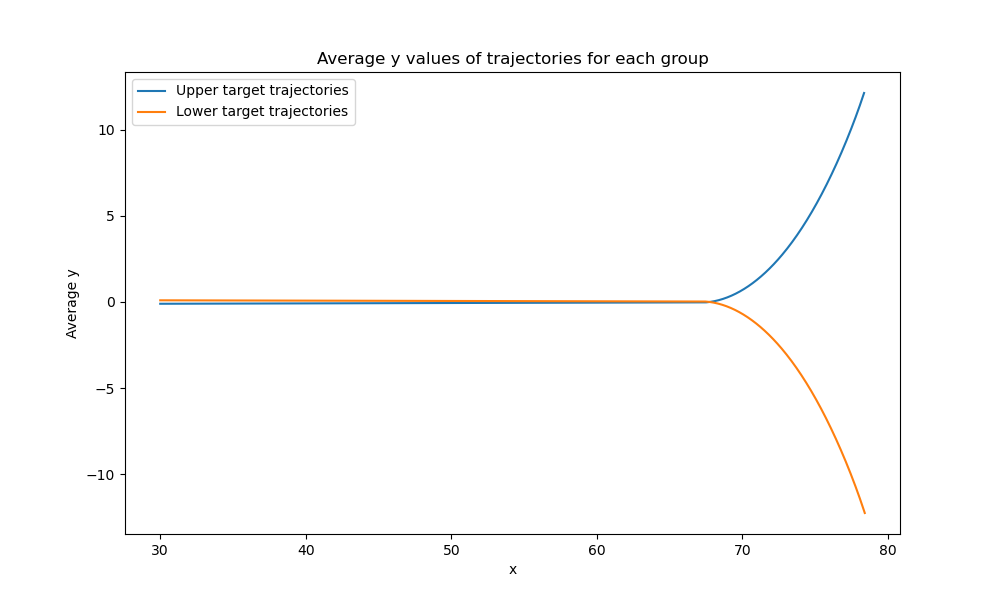

In [75]:
with open('k500_t50_simpl.pkl', 'rb') as f:
        params_ksmall, res_ksmall = pickle.load(f)

# Redefine common x values to start from 40 and go to the maximum x value across all trajectories
common_x_values = np.linspace(30, max([r.y[0][-1] for r in res_ksmall]), 1000)

# Lists to store the average y values for each group
avg_y_upper = []
avg_y_lower = []

# Calculate average y values for the upper group
for r in upper_target_trajectories:
    f = interp1d(r.y[0], r.y[1], fill_value="extrapolate", bounds_error=False)
    avg_y_upper.append(f(common_x_values))

avg_y_upper = np.nanmean(avg_y_upper, axis=0)

# Calculate average y values for the lower group
for r in lower_target_trajectories:
    f = interp1d(r.y[0], r.y[1], fill_value="extrapolate", bounds_error=False)
    avg_y_lower.append(f(common_x_values))

avg_y_lower = np.nanmean(avg_y_lower, axis=0)

# Plot the average y values for the two groups
plt.figure(figsize=(10, 6))
plt.plot(common_x_values, avg_y_upper, label='Upper target trajectories')
plt.plot(common_x_values, avg_y_lower, label='Lower target trajectories')
plt.xlabel('x')
plt.ylabel('Average y')
plt.legend()
plt.title('Average y values of trajectories for each group')
plt.show()